In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams.update({'font.size': 14})
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
rc('legend', fontsize=16)
matplotlib.rcParams['savefig.dpi'] = 1200
from matplotlib.colors import ListedColormap

from utils_design import *
%load_ext autoreload
%autoreload 2

In [2]:
out_dir = "../figures/"
out_path = out_dir 

In [3]:
N = 200; T = 10; lag = 0
sns.set_theme(style="whitegrid", font_scale=1)

Generate the fraction of treated units per period when the specification has no fixed effects, time fixed effect, unit fixed effect, two way fixed effect, or two way fixed effect with covariates

In [4]:
bm_treat_df = generate_bm_design(T, adj_pct=0)
opt_treat_df = solve_nonadaptive_opt_design(T, [lag])

all_Zs = dict()
for name in ['ff', 'ba', 'ffba']:
    all_Zs[name] = calc_cv_z_mtrx(N, T, bm_treat_df[name], cv=1)
all_Zs['opt'] = calc_cv_z_mtrx(N, T, opt_treat_df[lag], cv=1)
all_Zs['opt+'] = calc_cv_z_mtrx(N, T, opt_treat_df[lag], cv=4)

In [5]:
assum_dict = {'GLS': '$\mathrm{two}$-$\mathrm{way}\,\mathrm{fe}$+$\mathrm{covar}$', 
              'OLS': '$\mathrm{two}$-$\mathrm{way}\,\mathrm{fe}$',
             'unit': '$\mathrm{unit}\,\mathrm{fe}\,\mathrm{only}$', 
              'time': '$\mathrm{time}\,\mathrm{fe}\,\mathrm{only}$',
             'no': '$\mathrm{no}\,\mathrm{fe}$'}

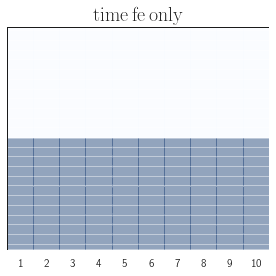

In [6]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(4,4))
sns.heatmap(all_Zs['ff'], cmap="Blues", linewidths=0.0, edgecolor="none", alpha=0.25, xticklabels=True, yticklabels=False, cbar=False)
ax.axhline(y=0, color='k',linewidth=1)
ax.axhline(y=N, color='k',linewidth=1)
ax.axvline(x=0, color='k',linewidth=1)
ax.axvline(x=T, color='k',linewidth=1)
ax.set_title(assum_dict['time'], fontsize=20)
ax.set_xticklabels(range(1,T+1))
plt.tight_layout()
plt.savefig(out_dir+"time-fe.pdf", dpi=10000)

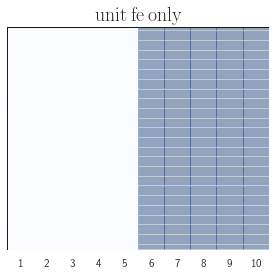

In [7]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(4,4))
sns.heatmap(all_Zs['ba'], cmap="Blues", linewidths=0.0, edgecolor="none", alpha=0.25, xticklabels=True, yticklabels=False, cbar=False)
ax.axhline(y=0, color='k',linewidth=1)
ax.axhline(y=N, color='k',linewidth=1)
ax.axvline(x=0, color='k',linewidth=1)
ax.axvline(x=T, color='k',linewidth=1)
ax.set_title(assum_dict['unit'], fontsize=20)
ax.set_xticklabels(range(1,T+1))
plt.tight_layout()
plt.savefig(out_dir+"unit-fe.pdf", dpi=10000)

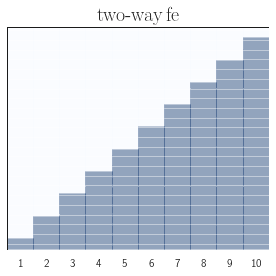

In [8]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(4,4))
sns.heatmap(all_Zs['opt'], cmap="Blues", linewidths=0.0, edgecolor="none", alpha=0.25, xticklabels=True, yticklabels=False, cbar=False)
ax.axhline(y=0, color='k',linewidth=1)
ax.axhline(y=N, color='k',linewidth=1)
ax.axvline(x=0, color='k',linewidth=1)
ax.axvline(x=T, color='k',linewidth=1)
ax.set_title(assum_dict['OLS'], fontsize=20)
ax.set_xticklabels(range(1,T+1))
plt.tight_layout()
plt.savefig(out_dir+"two-way-fe.pdf", dpi=10000)

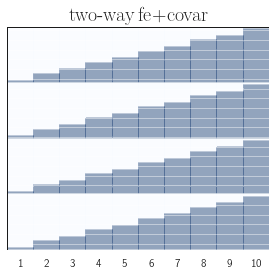

In [9]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(4,4))
sns.heatmap(all_Zs['opt+'], cmap="Blues", linewidths=0.0, edgecolor="none", alpha=0.25, xticklabels=True, yticklabels=False, cbar=False)
ax.axhline(y=0, color='k',linewidth=1)
ax.axhline(y=N, color='k',linewidth=1)
ax.axvline(x=0, color='k',linewidth=1)
ax.axvline(x=T, color='k',linewidth=1)
ax.set_title(assum_dict['GLS'], fontsize=20)
ax.set_xticklabels(range(1,T+1))
plt.tight_layout()
plt.savefig(out_dir+"two-way-fe-covar.pdf", dpi=10000)

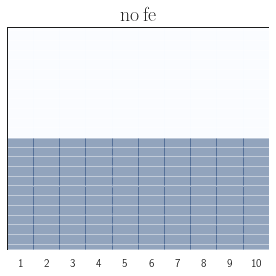

In [10]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(4,4))
sns.heatmap(all_Zs['ff'], cmap="Blues", linewidths=0.0, edgecolor="none", alpha=0.25, xticklabels=True, yticklabels=False, cbar=False)
ax.axhline(y=0, color='k',linewidth=1)
ax.axhline(y=N, color='k',linewidth=1)
ax.axvline(x=0, color='k',linewidth=1)
ax.axvline(x=T, color='k',linewidth=1)
ax.set_title(assum_dict['no'], fontsize=20)
ax.set_xticklabels(range(1,T+1))
plt.tight_layout()
plt.savefig(out_dir+"no-fe.pdf", dpi=10000)